## Observations and Insights 

In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata.head())
# print("-----------------------------------------------------------")
# print(study_results.head())
# print("-----------------------------------------------------------")

# Combine the data into a single dataset
mouseStudy_df =pd.merge(mouse_metadata,study_results,on="Mouse ID")
#mouseStudy_df

# Display the data table for preview
mouseStudy_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [273]:
# Checking the number of mice.


numOfMice = len(pd.unique(mouseStudy_df['Mouse ID']))
numOfMice

print("There are",numOfMice,"mice")


There are 249 mice


In [274]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 

duplicateMT = mouseStudy_df[mouseStudy_df.duplicated(['Mouse ID','Timepoint'])]
duplicateMouseID = pd.unique(duplicateMT["Mouse ID"])
duplicateMouseID

array(['g989'], dtype=object)

In [275]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseStudy_df.loc[mouseStudy_df['Mouse ID'] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [276]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouseStudy_df = mouseStudy_df.drop(mouseStudy_df[mouseStudy_df['Mouse ID'] == 'g989'].index)
cleaned_mouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [277]:
# Checking the number of mice in the clean DataFrame.
numOfMiceCleaned_df = len(pd.unique(cleaned_mouseStudy_df['Mouse ID']))
numOfMiceCleaned_df

print("There are",numOfMiceCleaned_df,"mice")

There are 248 mice


## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


regimen_groups = cleaned_mouseStudy_df.groupby("Drug Regimen")


meanRegimen = regimen_groups['Tumor Volume (mm3)'].mean()
#meanRegimen
medianRegimen = regimen_groups['Tumor Volume (mm3)'].median()
#medianRegimen
varianceRegimen = regimen_groups['Tumor Volume (mm3)'].var()
#varianceRegimen
standard_deviationRegimen = regimen_groups['Tumor Volume (mm3)'].std()
#standard_deviationRegimen
semRegimen = regimen_groups['Tumor Volume (mm3)'].sem()
print(semRegimen)

#Resulting series into single summary dataframe

summary_df=pd.concat({'mean':meanRegimen,
                       'median':medianRegimen,
                       'variance':varianceRegimen,
                       'standard_deviation':standard_deviationRegimen,
                       'SEM':semRegimen},axis=1)

summary_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(summary_df.to_markdown())
# Using the aggregation method, produce the same summary statistics in a single line
aggSummary_df =  cleaned_mouseStudy_df.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggSummary_df

| Drug Regimen   |    mean |   median |   variance |   standard_deviation |      SEM |
|:---------------|--------:|---------:|-----------:|---------------------:|---------:|
| Capomulin      | 40.6757 |  41.5578 |    24.9478 |              4.99477 | 0.329346 |
| Ceftamin       | 52.5912 |  51.7762 |    39.2902 |              6.26819 | 0.469821 |
| Infubinol      | 52.8848 |  51.8206 |    43.1287 |              6.56724 | 0.492236 |
| Ketapril       | 55.2356 |  53.6987 |    68.5536 |              8.27971 | 0.60386  |
| Naftisol       | 54.3316 |  52.5093 |    66.1735 |              8.13471 | 0.596466 |
| Placebo        | 54.0336 |  52.2889 |    61.1681 |              7.821   | 0.581331 |
| Propriva       | 52.3209 |  50.4463 |    43.852  |              6.62209 | 0.544332 |
| Ramicane       | 40.2167 |  40.6732 |    23.4867 |              4.84631 | 0.320955 |
| Stelasyn       | 54.2331 |  52.4317 |    59.4506 |              7.71042 | 0.573111 |
| Zoniferol      | 53.2365 |  51.8185 |    

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


Text(0, 0.5, 'Number of Timepoints')

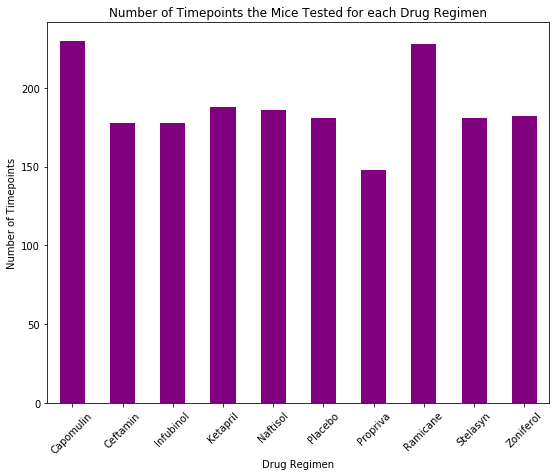

In [280]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Configure plot, figsize, title, and axis labels

#total number of timepoints for all mice tested for each drug regimen
numTimepointsPerDrug = cleaned_mouseStudy_df.groupby("Drug Regimen").count()['Timepoint']
print(numTimepointsPerDrug)

barplot_pandas =numTimepointsPerDrug.plot(kind="bar",facecolor="purple", figsize=(9,7), title="Number of Timepoints the Mice Tested for each Drug Regimen",rot=45)
barplot_pandas.set_ylabel("Number of Timepoints")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

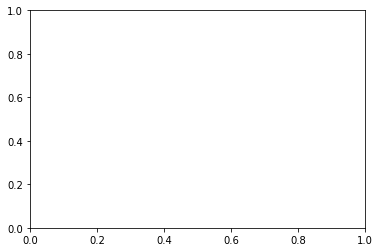

In [283]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis =cleaned_mouseStudy_df.groupby("Drug Regimen").count()['Timepoint']

bar_pyplot = plt.bar(x_axis, cleaned_mouseStudy_df['Timepoint'], color="violet", align="center")


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
